In [2]:
""" setup """

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal

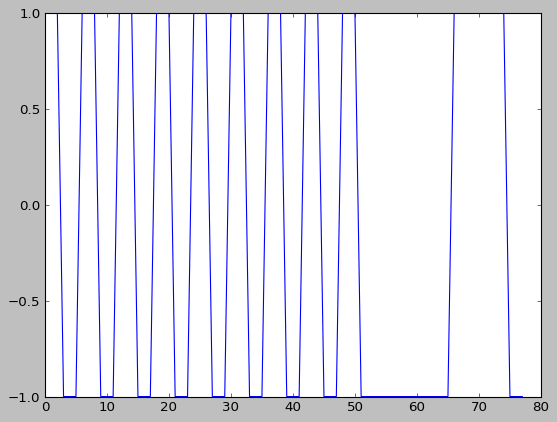

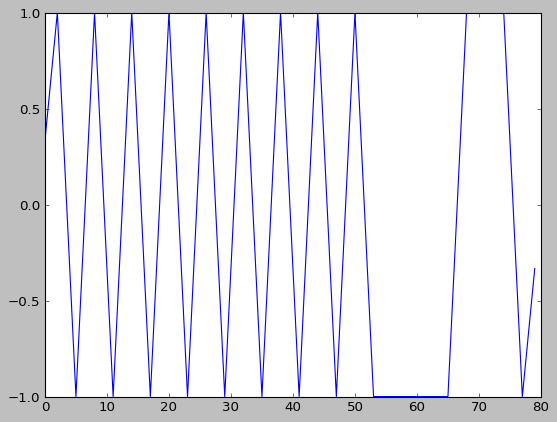

In [3]:
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
nrz = [1 if x == 1 else -1 for x in data]
sps = 3
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
plt.plot(nrz_data)
plt.show()

taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')
plt.plot(match_filtered)
plt.show()

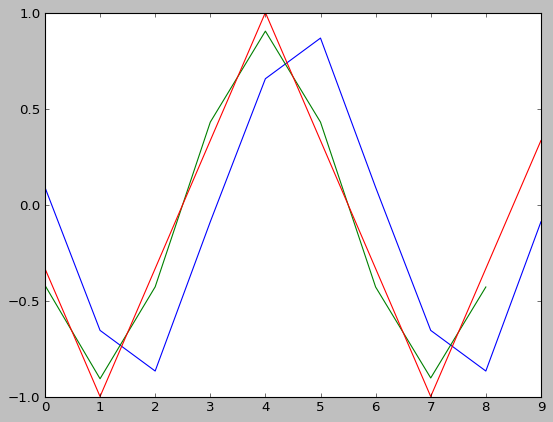

In [21]:
from pyhacores.under_construction.interpolator.model import Interpolator

# one pass
i = Interpolator()
iff = [i.filter(x, 0.36) for x in match_filtered]

# one pass
i2 = Interpolator()
iff2 = [i2.filter(x, 1-0.36) for x in iff]

plt.plot(iff[10+3:20+3])
plt.plot(iff2[10+1:20])
plt.plot(match_filtered[10:20])
plt.show()